In [1]:
!pip install scikit-learn
!pip install numpy

In [5]:
# Import required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Step 1: Create a small dataset
# Sample emails and their labels (1 = spam, 0 = not spam)
data = {
    'email': [
        'win free money now',
        'meeting at 10 am',
        'claim your prize today',
        'project update needed',
        'get rich quick offer',
        'lunch plans tomorrow'
    ],
    'label': [1, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Step 2: Convert text to numerical features (word counts)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['email'])  # Creates a word count matrix
y = df['label']  # Labels (spam or not)

In [6]:
# Step 3: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X, y)

# Step 4: Test with new emails
test_emails = [
    'win a free trip now',
    'team meeting at noon'
]
X_test = vectorizer.transform(test_emails)

# Predict
predictions = nb_classifier.predict(X_test)

# Step 5: Output results
for email, pred in zip(test_emails, predictions):
    print(f"Email: '{email}' -> {'Spam' if pred == 1 else 'Not Spam'}")

# Optional: Visualize feature importance (word probabilities)
feature_names = vectorizer.get_feature_names_out()
log_probs = nb_classifier.feature_log_prob_  # Log probabilities for each class
spam_probs = np.exp(log_probs[1])  # Exponentiate for spam class
not_spam_probs = np.exp(log_probs[0])  # Exponentiate for not spam class

Email: 'win a free trip now' -> Spam
Email: 'team meeting at noon' -> Not Spam


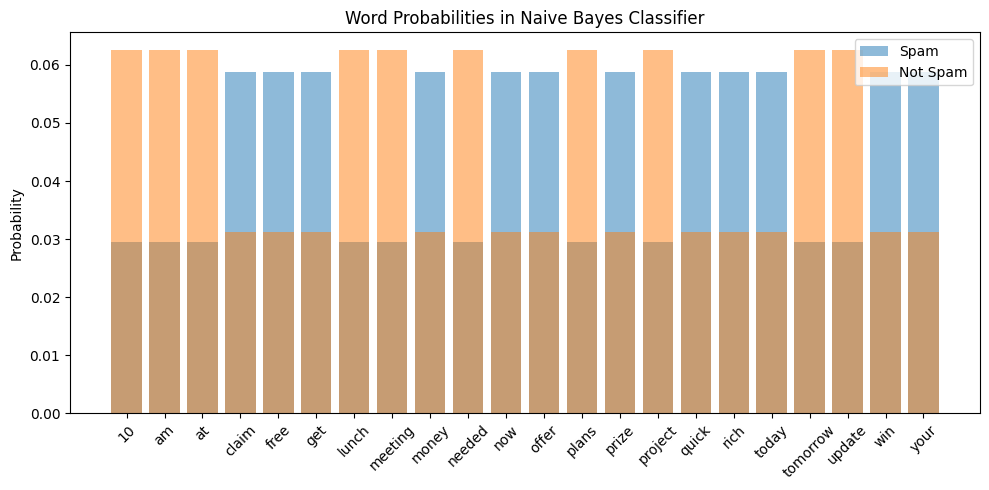

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(feature_names, spam_probs, alpha=0.5, label='Spam', color='#1f77b4')
plt.bar(feature_names, not_spam_probs, alpha=0.5, label='Not Spam', color='#ff7f0e')
plt.xticks(rotation=45)
plt.title('Word Probabilities in Naive Bayes Classifier')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.show()